error in line 9
invalid data: 
error in line 19
invalid data: 
error in line 29
invalid data: 
error in line 39
invalid data: 
error in line 49
invalid data: 
error in line 59
invalid data: 
error in line 69
invalid data: 
error in line 79
invalid data: 
error in line 89
invalid data: 
error in line 99
invalid data: 
error in line 109
invalid data: 
error in line 119
invalid data: 
error in line 129
invalid data: 
error in line 139
invalid data: 
error in line 149
invalid data: 
error in line 159
invalid data: 
error in line 169
invalid data: 
error in line 179
invalid data: 
error in line 189
invalid data: 
error in line 199
invalid data: 
error in line 209
invalid data: 
error in line 219
invalid data: 
error in line 229
invalid data: 
error in line 240
invalid data: 
error in line 251
invalid data: 
error in line 261
invalid data: 
error in line 271
invalid data: 
error in line 282
invalid data: 
error in line 292
invalid data: 
error in line 302
invalid data: 
error in line 312
inv

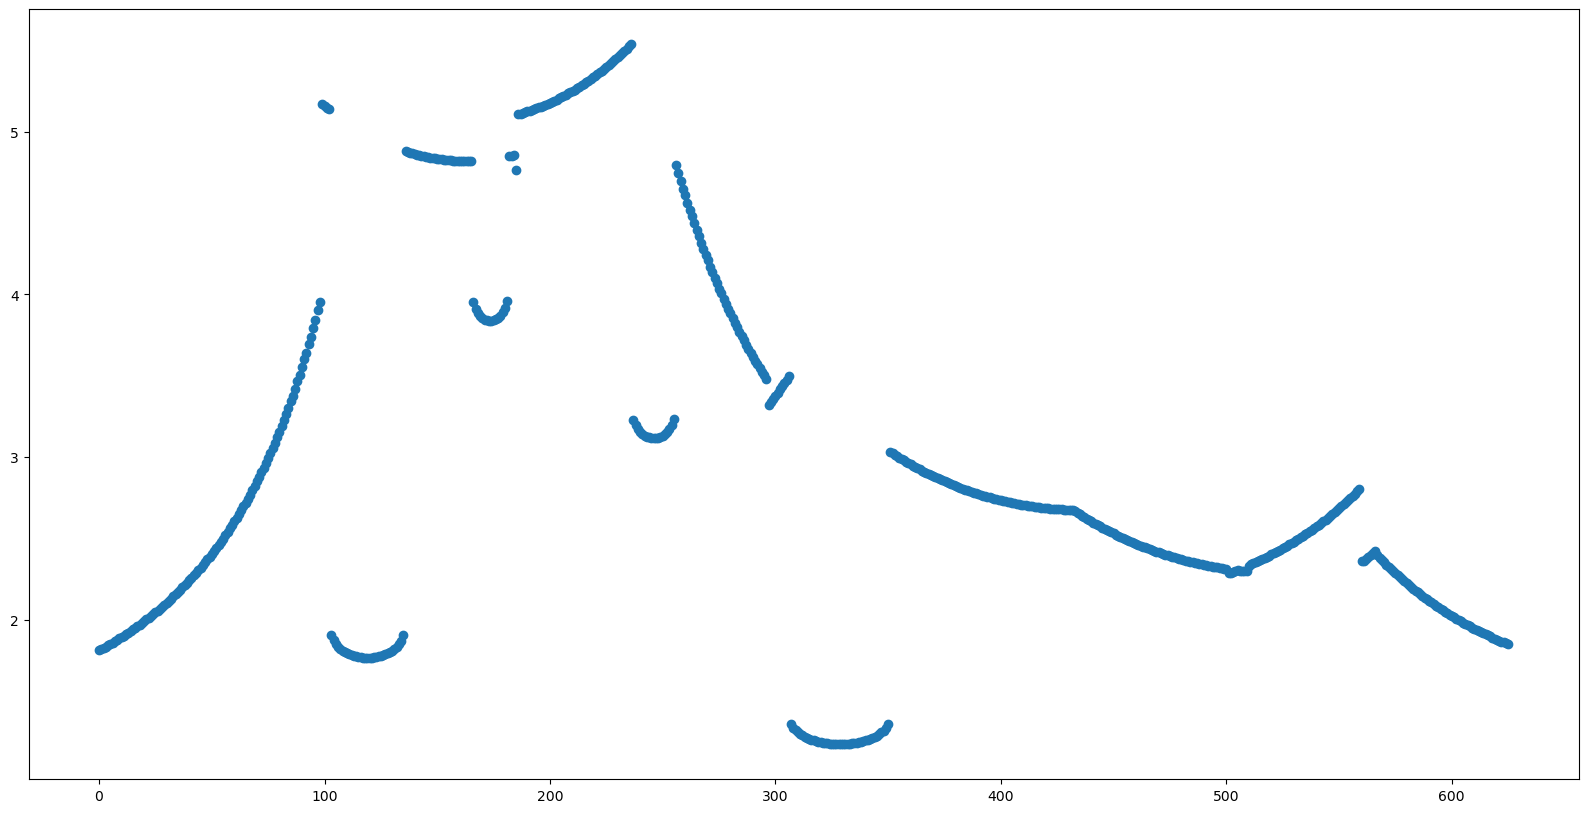

In [2]:
import matplotlib.pyplot as plt
# Inizializza una lista vuota per memorizzare tutti i dati
all_data = []
# Apri il file in modalità lettura
with open('data.txt', 'r') as file:
    # Leggi tutte le righe del file
    lines = file.readlines()

    # Itera attraverso le righe
    for line in lines:
        # Rimuovi il carattere di nuova riga
        line = line.strip()

        # Dividi la riga in una lista di valori
        data = line.split(',')
        # Aggiungi la lista di valori alla lista di tutti i dati
        for i in range(len(data)):
            all_data.append(data[i])

#chek if the data is a string o a number
for i in range(len(all_data)):
    try:
        all_data[i] = float(all_data[i])
    except ValueError:
        print("error in line", i)
        print("invalid data:", all_data[i])
        # delete all_data[i] from the list

#delete the data with '' form all_data
all_data = [x for x in all_data if x != '']

dataCleand = all_data[20:-20]

plt.figure(figsize=(20, 10))
plt.scatter(range(len(dataCleand)),dataCleand)
plt.show()


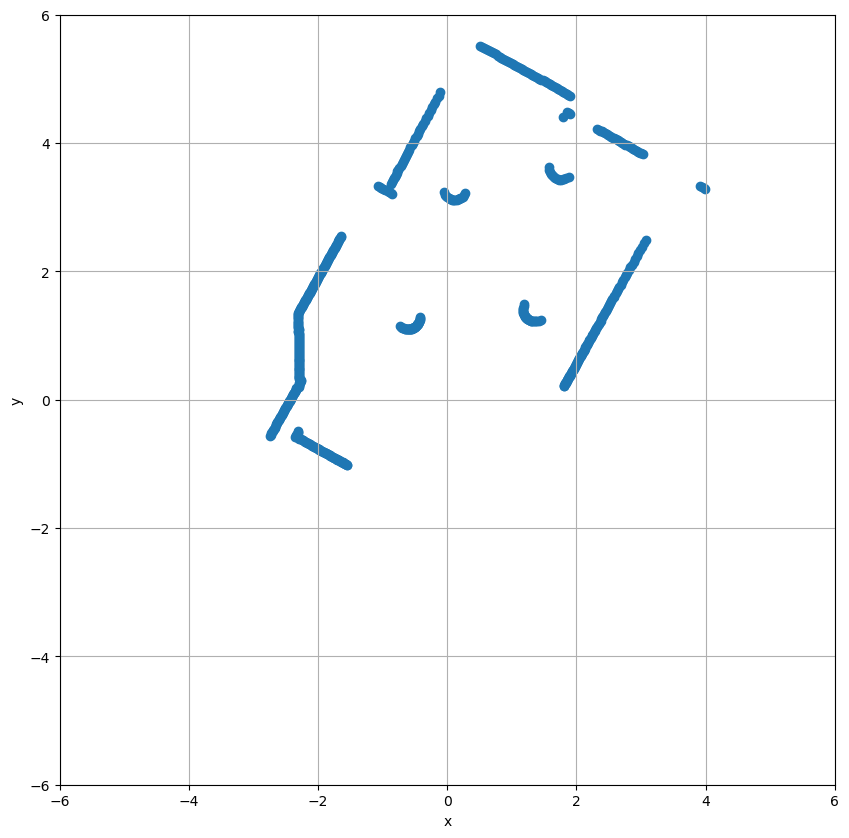

In [3]:
def diff_fin(fxh,fx,h):
    return (fxh-fx)/h
#costatnt 
h = 0.005774015095084906
derPrima = []
for i in range(len(dataCleand)-1):
    derPrima.append(diff_fin(dataCleand[i+1],dataCleand[i],h))

import math
incrementoTheta = 0.005774015095084906
theta_iniziale = 0 + (20*incrementoTheta)
def polarToCartesian(r, theta):
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x, y
#smooth data
def smooth_data(dataS, window_size):
    # Crea una lista vuota per memorizzare i dati
    smoothed_data = []
    # Itera attraverso i dati
    for i in range(len(dataS)):
        # Se il dato è troppo vicino al bordo, non è possibile calcolare la media
        if i < window_size or i >= len(dataS) - window_size:
            smoothed_data.append(dataS[i])
        else:
            # Calcola la media dei dati nel range
            total = 0
            for j in range(i - window_size, i + window_size + 1):
                total += dataS[j]
            smoothed_data.append(total / (window_size * 2 + 1)) 
    return smoothed_data

#convert the data in cartesian
dataCartesian = []
for i in range(len(dataCleand)):
    dataCartesian.append(polarToCartesian(dataCleand[i], theta_iniziale + (i*incrementoTheta)))

plt.figure(figsize=(10, 10))
plt.scatter([x[0] for x in dataCartesian],[x[1] for x in dataCartesian])
#limit the axis
plt.xlim(-6,6)
plt.ylim(-6,6)
#add label to the axis
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



In [4]:
kprint = 10
win = 1

625
[0, 99, 103, 136, 166, 182, 186, 237, 256, 307, 351, 560]
[3.0347132682800293, 3.0260581970214844, 3.01623272895813, 3.007694721221924, 2.998007297515869, 2.989593744277954, 2.981241226196289, 2.9729514122009277, 2.9647257328033447, 2.956566572189331, 2.9484751224517822, 2.9404542446136475, 2.933635950088501, 2.9257495403289795, 2.9179389476776123, 2.9113059043884277, 2.9036405086517334, 2.897134780883789, 2.889622688293457, 2.883251190185547, 2.876943588256836, 2.8696682453155518, 2.86350417137146, 2.8574087619781494, 2.851383686065674, 2.8454296588897705, 2.839548349380493, 2.8337414264678955, 2.8280105590820312, 2.822356700897217, 2.816782236099243, 2.8121981620788574, 2.806772470474243, 2.8014302253723145, 2.7970430850982666, 2.791858196258545, 2.7867612838745117, 2.7825825214385986, 2.777651309967041, 2.7736129760742188, 2.768853187561035, 2.764960527420044, 2.7611353397369385, 2.7566356658935547, 2.752963066101074, 2.749361276626587, 2.7458317279815674, 2.7416927814483643, 2.

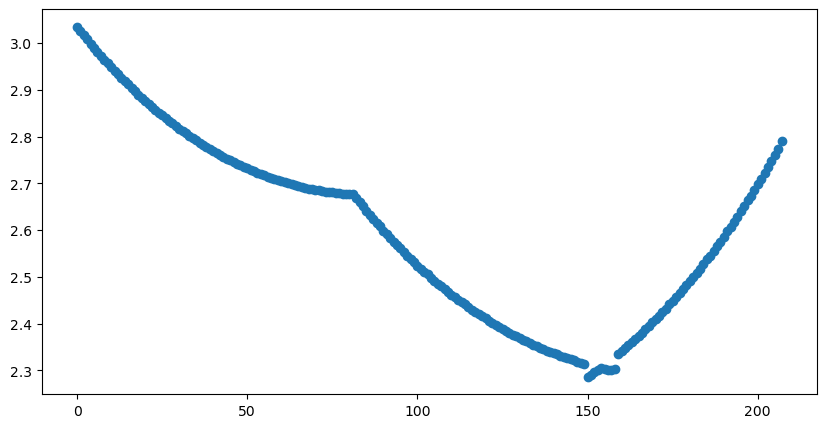

In [5]:
#divide the data in segment where the derivative if derivative is too big
segmentedData = []
segment = []
segment_index_begin = []
falg_begin = True

print(len(derPrima))

for i in range(len(dataCleand)-1):
    if abs(derPrima[i]) < 50:
        if(falg_begin) :
            segment_index_begin.append(i)
            falg_begin = False
        segment.append(dataCleand[i])
        #stamap qui per vedere le dimensioni delle due liste
       
    else :
        if(len(segment) > 0):
            segmentedData.append(segment)
        segment = []
        falg_begin = True
segmentedData.append(segment)

print(segment_index_begin)


print(segmentedData[kprint])    


plt.figure(figsize=(10, 5))
plt.scatter(range(len(segmentedData[kprint])),segmentedData[kprint])
plt.show()




12
12
12
12


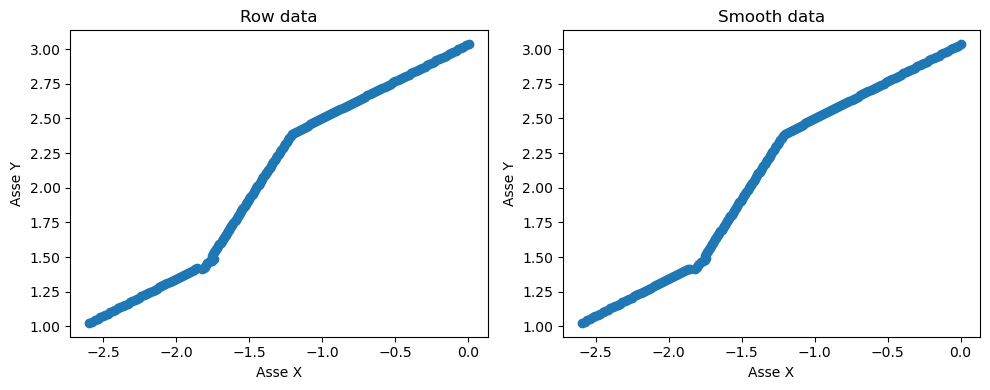

In [6]:
segmentCartesianX = []
segmentCartesianY = []

print(len(segmentedData))
print(len(segment_index_begin))
theta_iniziale = 3.14/2 
for i in range(len(segmentedData)):
    theta_iniziale_i = theta_iniziale
    segmentX = []
    segmentY = []
    for j in range(len(segmentedData[i])):
        x,y = polarToCartesian(segmentedData[i][j],theta_iniziale_i + (j*incrementoTheta))
        segmentX.append(x)
        segmentY.append(y)
    segmentCartesianX.append(segmentX)
    segmentCartesianY.append(segmentY)

#smooth the data
segmentCartesianY_smooth = []
for i in range(len(segmentCartesianY)):
    segmentCartesianY_smooth.append(smooth_data(segmentCartesianY[i], win))

print(len(segmentCartesianX))
print(len(segmentCartesianY))

#plot i a subplot the data and the soomth data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#add title
ax1.scatter(segmentCartesianX[kprint],segmentCartesianY[kprint])
ax1.set_title('Row data')
ax1.set_xlabel('Asse X')
ax1.set_ylabel('Asse Y')
ax2.scatter(segmentCartesianX[kprint],segmentCartesianY_smooth[kprint])
ax2.set_title('Smooth data')
ax2.set_xlabel('Asse X')
ax2.set_ylabel('Asse Y')
# Regola la distanza tra i subplot
plt.tight_layout()
plt.show()



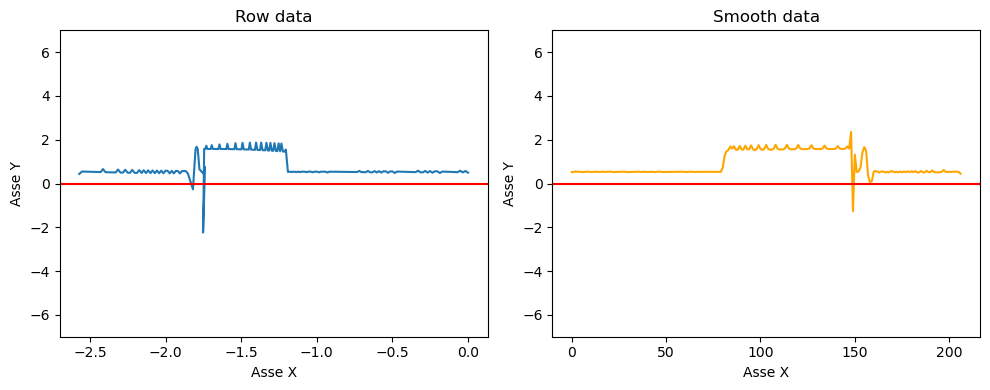

In [7]:



#calculate the derivative of the segmented data
segmentCartesianY_first_derivative = []
for i in range(len(segmentCartesianY)):
    segment_f_der = []
    for j in range(len(segmentCartesianY[i])-1):
        segment_f_der.append(diff_fin(segmentCartesianY[i][j+1],segmentCartesianY[i][j],segmentCartesianX[i][j+1]-segmentCartesianX[i][j]))
    segmentCartesianY_first_derivative.append(segment_f_der)

#calculate the derivative of the segmented data
segmentCartesianY_first_derivative_smooth = []
for i in range(len(segmentCartesianY_smooth)):
    segment_f_der = []
    for j in range(len(segmentCartesianY_smooth[i])-1):
        segment_f_der.append(diff_fin(segmentCartesianY_smooth[i][j+1],segmentCartesianY_smooth[i][j],segmentCartesianX[i][j+1]-segmentCartesianX[i][j]))
    segmentCartesianY_first_derivative_smooth.append(segment_f_der)
    
#plot i a subplot the data and the soomth data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
lim = 7
#add title
ax1.plot(segmentCartesianX[kprint][:-1],segmentCartesianY_first_derivative[kprint])
ax1.set_title('Row data')
ax1.set_xlabel('Asse X')
ax1.set_ylabel('Asse Y')
ax1.set_ylim(-lim, lim)
#plot 0 line
ax1.axhline(y=0, color='r', linestyle='-')

ax2.plot(segmentCartesianY_first_derivative_smooth[kprint],c='orange')

ax2.set_title('Smooth data')
ax2.set_xlabel('Asse X')
ax2.set_ylabel('Asse Y')
ax2.set_ylim(-lim, lim)
ax2.axhline(y=0, color='r', linestyle='-')

# Regola la distanza tra i subplot
plt.tight_layout()
plt.show()

    

Eventualmente possiamo specchiare i dati ricarlocare la derivata

In [8]:
#get just the segment with the derivative near to 0
segment_filtered_index = []
for i in range(len(segmentCartesianY_first_derivative_smooth)):
    count = 0
    for j in range(len(segmentCartesianY_first_derivative_smooth[i])):
        if abs(segmentCartesianY_first_derivative_smooth[i][j]) < 0.1:
            count = count +1
    if count < 10 and count > 0:
        segment_filtered_index.append(i)
print(segment_filtered_index)




#if the segment is too short delete it
segment_filtered_index = [x for x in segment_filtered_index if len(segmentCartesianY_smooth[x]) > 6]
print(segment_filtered_index)



to_keep = []
#if the derivative before 0 vale is positive delete it
for i in range(len(segment_filtered_index)):
    totalSum = 0
    count = 0
    #reverse cycle
    for j in range(len(segmentCartesianY_first_derivative_smooth[segment_filtered_index[i]])):
        if not (abs(segmentCartesianY_first_derivative_smooth[segment_filtered_index[i]][j]) < 0.1):
            totalSum = totalSum + segmentCartesianY_first_derivative_smooth[segment_filtered_index[i]][j]
            count = count +1
        else:
            break
    if count > 0:
        mean = totalSum/count
        if mean > 0:
            to_keep.append(i)

print(to_keep)

#ciclo per tenere solo gli elementi degli indici to_keep
segment_filtered_index1 = []
for i in range(len(to_keep)):
    segment_filtered_index1.append(segment_filtered_index[to_keep[i]])

segment_filtered_index= segment_filtered_index1
print(segment_filtered_index)

for i in range(len(segment_filtered_index)):
    totalSum = 0
    count = 0
    #reverse cycle
    for j in range(len(segmentCartesianY_first_derivative_smooth[segment_filtered_index[i]])-1,0,-1):
        if not (abs(segmentCartesianY_first_derivative_smooth[segment_filtered_index[i]][j]) < 0.1):
            totalSum = totalSum + segmentCartesianY_first_derivative_smooth[segment_filtered_index[i]][j]
            count = count +1
        else:
            break
    if count > 0:
        mean = totalSum/count
        if mean < 0:
            to_keep.append(i)
print(to_keep)
#ciclo per tenere solo gli elementi degli indici to_keep
segment_filtered_index1 = []
for i in range(len(to_keep)):
    segment_filtered_index1.append(segment_filtered_index[to_keep[i]])

print(segment_filtered_index)



[2, 4, 7, 9, 10, 11]
[2, 4, 7, 9, 10, 11]
[0, 1, 2, 3, 4]
[2, 4, 7, 9, 10]
[0, 1, 2, 3, 4, 0, 1, 2, 3]
[2, 4, 7, 9, 10]


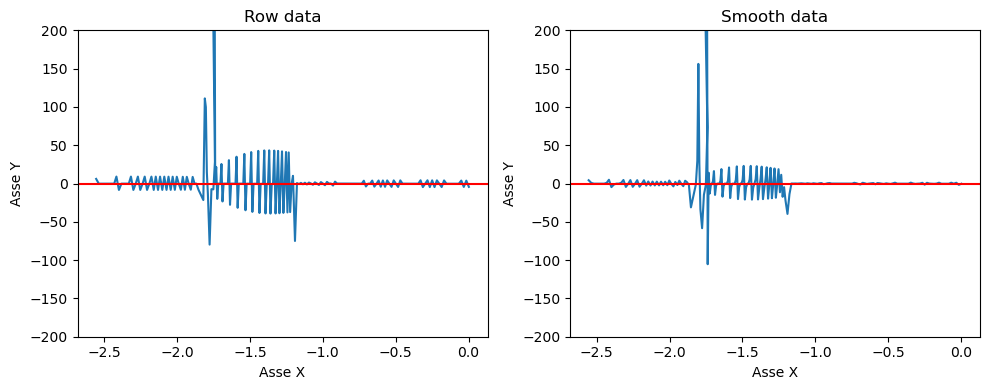

In [9]:
#calculate the derivative of the segmented data
segmentCartesianY_second_derivative = []
for i in range(len(segmentCartesianY_first_derivative)):
    segment_s_der = []
    for j in range(len(segmentCartesianY_first_derivative[i])-1):
        segment_s_der.append(diff_fin(segmentCartesianY_first_derivative[i][j+1],segmentCartesianY_first_derivative[i][j],segmentCartesianX[i][j+1]-segmentCartesianX[i][j]))
    segmentCartesianY_second_derivative.append(segment_s_der)

#calculate the second derivative of the smoothed data
segmentCartesianY_second_derivative_smooth = []
for i in range(len(segmentCartesianY_first_derivative_smooth)):
    segment_s_der = []
    for j in range(len(segmentCartesianY_first_derivative_smooth[i])-1):
        segment_s_der.append(diff_fin(segmentCartesianY_first_derivative_smooth[i][j+1],segmentCartesianY_first_derivative_smooth[i][j],segmentCartesianX[i][j+1]-segmentCartesianX[i][j]))
    segmentCartesianY_second_derivative_smooth.append(segment_s_der)
#plot i a subplot the data and the soomth data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
lim =200
#add title
ax1.plot(segmentCartesianX[kprint][:-2],segmentCartesianY_second_derivative[kprint])
ax1.set_title('Row data')
ax1.set_xlabel('Asse X')
ax1.set_ylabel('Asse Y')
ax1.set_ylim(-lim, lim)
#plot 0 line
ax1.axhline(y=0, color='r', linestyle='-')

ax2.plot(segmentCartesianX[kprint][:-2],segmentCartesianY_second_derivative_smooth[kprint])
ax2.set_title('Smooth data')
ax2.set_xlabel('Asse X')
ax2.set_ylabel('Asse Y')
#set log scale for the y axis
ax2.set_ylim(-lim, lim)
ax2.axhline(y=0, color='r', linestyle='-')

# Regola la distanza tra i subplot
plt.tight_layout()
plt.show()

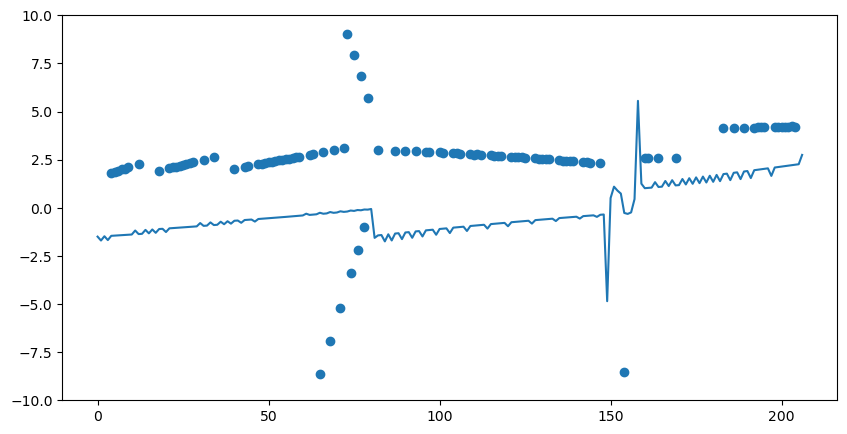

In [10]:
#calcualte the derivative for the porlar data
segmentedDataPolar_first_derivative = []
for i in range(len(segmentedData)):
    segment_f_p_der = []
    for j in range(len(segmentedData[i])-1):
        segment_f_p_der.append(diff_fin(segmentedData[i][j+1],segmentedData[i][j],incrementoTheta))
    segmentedDataPolar_first_derivative.append(segment_f_p_der)

plt.figure(figsize=(10, 5))

plt.plot(range(len(segmentedDataPolar_first_derivative[kprint])),segmentedDataPolar_first_derivative[kprint])

#calcualte the second derivative for the porlar data

segmentedDataPolar_second_derivative = []
for i in range(len(segmentedDataPolar_first_derivative)):
    segment_s_p_der = []
    for j in range(len(segmentedDataPolar_first_derivative[i])-1):
        segment_s_p_der.append(diff_fin(segmentedDataPolar_first_derivative[i][j+1],segmentedDataPolar_first_derivative[i][j],incrementoTheta))
    segmentedDataPolar_second_derivative.append(segment_s_p_der)

plt.scatter(range(len(segmentedDataPolar_second_derivative[kprint])),segmentedDataPolar_second_derivative[kprint])
plt.ylim(-10, 10)
plt.show()







In [11]:
to_delete = []
for i in range(len(segment_filtered_index)):
    count = 0
    for j in range(len(segmentedDataPolar_second_derivative[segment_filtered_index[i]])):
        print(segmentedDataPolar_second_derivative[segment_filtered_index[i]][j])
        if abs(segmentedDataPolar_second_derivative[segment_filtered_index[i]][j]) < 0.1:
            count = count +1
    #print for debug cout segment_filtered_index[i]
    print("count è ",count," di ",len(segmentedDataPolar_second_derivative[segment_filtered_index[i]])," in ",segment_filtered_index[i]," di ",len(segmentedDataPolar_second_derivative)," segmenti")
    if count > 4:
        to_delete.append(i)

segment_filtered_index = [x for x in segment_filtered_index if x not in to_delete]
print(segment_filtered_index)


442.86853588308287
15.879434895538978
283.4877813156985
-67.3508299239748
149.672881173692
34.64799012334443
-46.647851305382
115.50760298705049
12.21082417659663
1.8343053594711647
12.711414333177466
52.57626901688924
1.5589807733517222
1.566132061302879
58.79431389041825
1.7663681239352071
1.6054641450342266
30.19273772977509
50.59893789839497
-16.472991795484813
12.88304524400516
57.56786800679524
2.6424008979516524
54.721655402235655
35.78146926360246
4.090536708060489
49.140075156359444
82.60810276776334
189.53416021342827
44.67409583086328
count è  0  di  30  in  2  di  12  segmenti
487.03846591338987
253.3987372612151
124.47531807779852
42.97924058643963
169.45691929056147
95.89162013703317
39.41789918676463
151.2640427428239
52.96243856625162
61.794279185927635
151.96486896203706
268.3020213514215
119.6052909830622
count è  0  di  13  in  4  di  12  segmenti
255.2795259923689
220.07373540883438
181.4782343364524
72.04207481993234
45.846907054852714
130.9043259458865
-3.86169549